### Import necessary libraries and dependencies.

In [1]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
import glob

### Get the list of images and masks along with the path w.r.t the current folder

In [2]:
image_file_path_list = glob.glob('Dataset/images/*.*')
mask_file_path_list = glob.glob('Dataset/masks/*.*')

In [3]:
print(image_file_path_list)
print(mask_file_path_list)

['Dataset/images\\image_crocus_0001.png', 'Dataset/images\\image_crocus_0002.png', 'Dataset/images\\image_crocus_0003.png', 'Dataset/images\\image_crocus_0004.png', 'Dataset/images\\image_crocus_0005.png', 'Dataset/images\\image_crocus_0006.png', 'Dataset/images\\image_crocus_0007.png', 'Dataset/images\\image_crocus_0008.png', 'Dataset/images\\image_crocus_0009.png', 'Dataset/images\\image_crocus_0010.png', 'Dataset/images\\image_crocus_0011.png', 'Dataset/images\\image_crocus_0012.png', 'Dataset/images\\image_crocus_0013.png', 'Dataset/images\\image_crocus_0014.png', 'Dataset/images\\image_crocus_0015.png', 'Dataset/images\\image_crocus_0016.png', 'Dataset/images\\image_crocus_0017.png', 'Dataset/images\\image_crocus_0018.png', 'Dataset/images\\image_crocus_0019.png', 'Dataset/images\\image_crocus_0020.png', 'Dataset/images\\image_crocus_0021.png', 'Dataset/images\\image_crocus_0022.png', 'Dataset/images\\image_crocus_0023.png', 'Dataset/images\\image_crocus_0024.png', 'Dataset/images

### Check a Randomly Selected Image and the Corresponding Mask

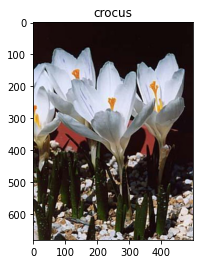

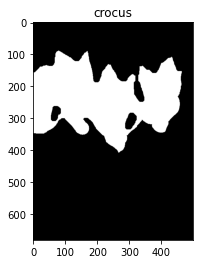

In [4]:
idx=5

img = cv2.imread(image_file_path_list[idx])
img= cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img, cmap='gray')
plt.title(image_file_path_list[idx].split("\\")[-1].split('_')[-2])
plt.show()

img = cv2.imread(mask_file_path_list[idx])
plt.imshow(img)
plt.title(mask_file_path_list[idx].split("\\")[-1].split('_')[-2])
plt.show()

### Feature Extraction from Images

Every machine learning algorithms requires numeric features to be fed to it.
We need to extract features from these images. Here, we are going to extract the RGB histogram from each color images. This histogram will act as a feature vector and represent an image.

In [5]:

# Create RGB color histogram feature vectors
#------------------------------------------------------------------------------

class RGBHistogram:
	def __init__(self, bins):
		# Store the number of bins for the histogram
		self.bins = bins

	def describe(self, image, mask = None):
		# Compute a 3D RGB histogram and normalize so that images
		# with the same content will have roughly the same histogram
		hist = cv2.calcHist([image], [0, 1, 2], mask, self.bins, [0, 256, 0, 256, 0, 256])
		cv2.normalize(hist, hist)

		# Return 3D histogram as a flattened array
		return hist.flatten()


#------------------------------------------------------------------------------


### Data Preparation
Lets us read the data from files and populate two lists - one will contain all the file names containing the original images. The other will contain the names of all the mask files. We iterate through a loop and create the RGB hostogram vectors for all the images. At the end, we get two lists - data - containing the numeric vectors representing all the original images in the dataset; target containing the categorical labels of the flower classes (four unique values).

In [6]:

# Initialize the list of data and class label targets
data = []
target = []

# Initialize the image descriptor
desc = RGBHistogram([8, 8, 8])

i=0

# Loop over the image and mask paths
for (imageFile, maskFile) in zip(image_file_path_list, mask_file_path_list):
  #----------------------------------------------------------------------------
  # Read the images and preprocess
    image = cv2.imread(imageFile)
    mask = cv2.imread(maskFile)
    mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)
  
  # Preprocess : equalize the dimensions of the files in case they are not same
    r1, c1, d1 =image.shape
    r2, c2 = mask.shape

    if r1 <= r2:
        r_min = r1
    else :
        r_min = r2
    
    if c1 <= c2:
        c_min = c1
    else :
        c_min = c2
  
    image=image[0:r_min, 0:c_min]
    mask = mask[0:r_min, 0:c_min]
  
    #print(image.shape)
    #print(mask.shape)

    #----------------------------------------------------------------
  
    # Describe the image
    features = desc.describe(image, mask)  # Calculate RGB Histograms
  
    # Update the list of data and targets
    data.append(features)
    target.append(image_file_path_list[i].split("\\")[-1].split('_')[-2]) # extracting the type of flower from the name of the file itself
    i=i+1
    

print('\n Data processed successfully... ')



 Data processed successfully... 


### Data Transformation

Data read needs to be transformed. The class labels are categorical data. We need to convert the labels into numeric values.

In [7]:
print('\n Target : {}'.format(target)) # class labels for all the images corresponding to the four classes/categories 

# grab the unique target names and encode the labels
targetNames = np.unique(target)   # classes crocus, daisy, pansy, sunflower
print('\n Unique target labels are : {}'.format(targetNames))


le = LabelEncoder()
# Convert class labels to numbers 0 1 2 3 corresponding to the four classes 
target = le.fit_transform(target)
print('\n Target : {}'.format(target)) 


 Target : ['crocus', 'crocus', 'crocus', 'crocus', 'crocus', 'crocus', 'crocus', 'crocus', 'crocus', 'crocus', 'crocus', 'crocus', 'crocus', 'crocus', 'crocus', 'crocus', 'crocus', 'crocus', 'crocus', 'crocus', 'crocus', 'crocus', 'crocus', 'crocus', 'crocus', 'crocus', 'crocus', 'crocus', 'crocus', 'crocus', 'crocus', 'crocus', 'crocus', 'crocus', 'crocus', 'crocus', 'crocus', 'crocus', 'crocus', 'crocus', 'crocus', 'crocus', 'crocus', 'crocus', 'crocus', 'crocus', 'crocus', 'crocus', 'crocus', 'crocus', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'd

### Train and Test Split¶

In [8]:
# Keep 70% for training, 30% for testing
(trainData, testData, trainTarget, testTarget) = train_test_split(data, target, test_size = 0.3, random_state = 42)

### Train a Random Forest Classifier
Let us create a machine learning model - in this example - a Support Vector Machine classifier. This is an ensamble technique that takes the votes of a number of weak classifiers and builds a strong one.

In [9]:
model = RandomForestClassifier()
model.fit(trainData, trainTarget)

RandomForestClassifier()

### Model Evaluation

In [10]:
print('\n Classification Report : \n\n')
print(classification_report(testTarget, model.predict(testData), target_names = targetNames))


 Classification Report : 


              precision    recall  f1-score   support

      crocus       0.93      0.87      0.90        15
       daisy       0.74      0.93      0.82        15
       pansy       0.94      0.84      0.89        19
   sunflower       1.00      0.80      0.89         5

    accuracy                           0.87        54
   macro avg       0.90      0.86      0.87        54
weighted avg       0.89      0.87      0.87        54



### Test on randomly selected images

In [11]:
for i in [34, 67, 22, 34, 87] :
  
    imagePath=image_file_path_list[i]
    maskPath=mask_file_path_list[i]
  
 
    # load the image and mask
    image = cv2.imread(imagePath)
    mask = cv2.imread(maskPath)
    mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)

    r1, c1, d1 =image.shape
    r2, c2 = mask.shape

    if r1 <= r2:
        r_min = r1
    else :
        r_min = r2
    
    if c1 <= c2:
        c_min = c1
    else :
        c_min = c2
  
    image=image[0:r_min, 0:c_min]
    mask = mask[0:r_min, 0:c_min]
  
    # describe the image
    features = desc.describe(image, mask)
    #print('\n Feature dimension : {}'.format(features.shape))

    #print('\n Features calculated.........')
    num_label = model.predict(features.reshape(1,-1)) # numeric label
        
    # Predict what type of flower the image is..numeric to categorical label
    flower = le.inverse_transform(num_label) 
    print(image_file_path_list[i])
    print("The flower is identified as a {} \n".format(flower))

Dataset/images\image_crocus_0035.png
The flower is identified as a ['crocus'] 

Dataset/images\image_daisy_0139.png
The flower is identified as a ['daisy'] 

Dataset/images\image_crocus_0023.png
The flower is identified as a ['crocus'] 

Dataset/images\image_crocus_0035.png
The flower is identified as a ['crocus'] 

Dataset/images\image_daisy_0159.png
The flower is identified as a ['daisy'] 

